In [408]:
import requests
from skimage import io
import cv2
import json
import os
import pprint

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

os.sys.path

['',
 '/home/kaijuan/anaconda3/lib/python36.zip',
 '/home/kaijuan/anaconda3/lib/python3.6',
 '/home/kaijuan/anaconda3/lib/python3.6/lib-dynload',
 '/home/kaijuan/anaconda3/lib/python3.6/site-packages',
 '/home/kaijuan/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/kaijuan/.ipython']

In [409]:
# image feature generation using azure img api and open cv generation
# cv_key = open('azure_cfg.txt','r')

subscription_key_img = '2c5991ae4f584a9b8acd1152cc48da4c'

vision_base_url="https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/"
vision_analyse_url=vision_base_url + 'analyze?'

In [410]:
def extract_high_level_features(image_path):
    headers={'Ocp-Apim-Subscription-Key':subscription_key_img,
             'Content-Type': 'application/json'}
    params = {'visualfeatures':'Adult, Categories, Description, Color, Faces, ImageType, Tags'}
    data = {'url':image_path}

    response = requests.post(vision_analyse_url, headers=headers, params=params, json=data)
    response.raise_for_status()
    data_back = response.json()
    
    features = {
        "clip_art_type"                      : data_back["imageType"]["clipArtType"],
        "line_drawing_type"                  : data_back["imageType"]["lineDrawingType"],
        "is_black_and_white"                 : int(data_back["color"]["isBwImg"]),
        "is_adult_content"                   : int(data_back["adult"]["isAdultContent"]),
        "adult_score"                        : data_back["adult"]["adultScore"],
        "is_racy"                            : int(data_back["adult"]["isRacyContent"]),
        "racy_score"                         : data_back["adult"]["racyScore"],
        "has_faces"                          : int(len(data_back["faces"])),
        "num_faces"                          : len(data_back["faces"]),
        "is_dominant_color_background_black" : int(data_back["color"]["dominantColorBackground"] == "Black"),
        "is_dominant_color_foreground_black" : int(data_back["color"]["dominantColorForeground"] == "Black")
    }
    
#     return features
    return list(features.values())

In [411]:
width, height = 128, 64
descriptor = cv2.HOGDescriptor(_winSize = (width,height),
                               _blockSize = (16,16),
                               _blockStride = (8,8),
                               _cellSize = (8,8),
                               _nbins = 9)

# compute HOG features for an image
def extract_low_level_features(image_path, descriptor=descriptor):
    image = io.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (width,height))

    hog = descriptor.compute(image)
    hog = hog.flatten().tolist()
    return hog

In [412]:
# conduct low- and high-level feature extraction for images in a directory
def extract_all_features(image_url_list):
    features = []
    for path in range(len(image_url_list)):
#         print(path)
        high_level_features = extract_high_level_features(image_url_list[path])
#         low_level_features = extract_low_level_features(image_url_list[path])
        
        features.append(high_level_features)
    
#         features.append({**high_level_features})
    return features

In [415]:
def read_img_url(jsonFile,filesize):
    data = json.load(open(jsonFile))
    server_img_url_list=[]
    for j in range(0,filesize):
        server_img_url = 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/'+ data[j]['image']
        server_img_url_list.append(server_img_url)
    return server_img_url_list

In [419]:
train_img_url_list = read_img_url('train.json',600)
train_img_features = extract_all_features(train_img_url_list)


In [337]:
# test_img_url_list=read_img_url('test.json')[:30]
# print(test_img_url_list)
# test_img_features=extract_all_features(test_img_url_list)
# print(test_img_features)

['https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020000.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020001.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020002.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020003.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020004.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020005.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020006.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020007.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020008.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020009.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_test_000000020010.jpg', 'https://cvc.ischool.utexas.edu/~dannag/VizWiz/Images/VizWiz_tes

In [420]:
from pandas import DataFrame
from IPython.display import display

img_df = DataFrame(data=train_img_features)
display(img_df)

# df = DataFrame(data=test_img_features)
# display(df)

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0.009211,0,0.013450,0,0,0,0
1,0,0,0,0,0.017213,0,0.013662,0,0,0,1
2,0,0,0,0,0.023343,0,0.023612,0,0,0,0
3,0,0,0,0,0.020602,0,0.025315,0,0,0,0
4,0,0,0,0,0.020321,0,0.014635,0,0,1,0
5,0,0,0,0,0.237387,0,0.085779,0,0,0,1
6,0,0,0,0,0.016934,0,0.033168,0,0,0,0
7,0,0,0,0,0.190244,0,0.102289,0,0,1,0
8,0,0,0,0,0.067272,0,0.124366,0,0,1,0
9,0,0,0,0,0.096587,0,0.098225,0,0,0,0


In [19]:
'''
text feature extration
'''

import nltk
import pprint
import requests
import json
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/kaijuan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading p

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /home/kaijuan/nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-da

True

In [421]:
subscription_key_text = 'f7107338c32d4fcb9191477c4227e962'

text_analytics_base_url = "https://westcentralus.api.cognitive.microsoft.com/text/analytics/v2.0/"
language_api_url = text_analytics_base_url + "languages"
sentiment_api_url = text_analytics_base_url + "sentiment"
key_phrase_api_url = text_analytics_base_url + "keyPhrases"



In [422]:

# evaluate text "documents" using the Microsoft Azure Cognitive Services Text Analytics API
def analyze_text(documents):
    headers   = {"Ocp-Apim-Subscription-Key": subscription_key_text}
    
    # query API for language analysis
    response  = requests.post(language_api_url, headers=headers, json=documents)
    languages = response.json()
    
    # query API for sentiment analysis
    response  = requests.post(sentiment_api_url, headers=headers, json=documents)
    sentiments = response.json()
    
    # query API for key phrases extraction
    response  = requests.post(key_phrase_api_url, headers=headers, json=documents)
    key_phrases = response.json()
    
    return (languages, sentiments, key_phrases)


In [423]:
def pos_tag_text(documents):
    tag_counts = []
    
    for doc in documents['documents']:
        text = nltk.word_tokenize(doc['text'])
        tags = nltk.pos_tag(text)
        frequencies = nltk.FreqDist(tag for (word, tag) in tags)
        tag_count={
            'ADJ':0,
            'ADV':0,
            'CONJ':0,
            'NOUN':0,
            'NUM':0,
            'PRON':0,
            'VERB':0
        }
        
        for tag, count in frequencies.most_common():
            tag_count[tag] =count
        tag_counts.append(tag_count)
    return tag_counts


In [424]:
# get the question documents from the training set
def get_train_questions(json_file,filesize):
#     labels = json.load(open('train.json'))
    labels = json.load(open(json_file))
    documents = []
    for index, document in enumerate(labels):
        if index < filesize:
            documents.append({
                'id': index,
                'text': document['question']
            })
    
    return {'documents': documents}

In [342]:
# get the question documents from the training set
def get_test_questions(json_file):
#     labels = json.load(open('train.json'))
    labels = json.load(open(json_file))
    documents = []
    for index, document in enumerate(labels):
        if index < 30:
            documents.append({
                'id': index,
                'text': document['question']
            })
    
    return {'documents': documents}

In [425]:
train_documents = get_train_questions('train.json',600)
pprint.pprint(train_documents)

# test_documents = get_test_questions('test.json')
# pprint.pprint(test_documents)

{'documents': [{'id': 0, 'text': "What's the name of this product?"},
               {'id': 1, 'text': 'Can you tell me what is in this can please?'},
               {'id': 2,
                'text': 'Is this enchilada sauce or is this tomatoes?  Thank '
                        'you.'},
               {'id': 3, 'text': 'What is the captcha on this screenshot?'},
               {'id': 4, 'text': 'What is this item?'},
               {'id': 5, 'text': "What's this?"},
               {'id': 6, 'text': 'What is in this bottle?'},
               {'id': 7, 'text': 'This item.'},
               {'id': 8, 'text': 'What color do these look?'},
               {'id': 9, 'text': 'Surface look clean? Thank you.'},
               {'id': 10, 'text': 'Is this.'},
               {'id': 11,
                'text': 'What is the sodium content of this can of food?'},
               {'id': 12, 'text': 'what is this?'},
               {'id': 13, 'text': 'What kind of drink is this?'},
               {'id': 

In [426]:
def get_tfidf_doc(filesize):
    labels = json.load(open('train.json'))
    for ele in labels:
        tfidf_doc = []
        for index, document in enumerate(labels):
            if index < filesize:
                tfidf_doc.append(document['question'])
    return tfidf_doc




In [427]:
'''
get tfidf
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_doc = get_tfidf_doc(600)
vectorizer = TfidfVectorizer(stop_words='english')

tfidf_train = vectorizer.fit_transform(tfidf_doc)
tfidf_train.shape
print(tfidf_train.shape)

tfidf_train_array=tfidf_train.toarray()
tfidf_df = DataFrame(data=tfidf_train_array)
display(tfidf_df)

(600, 449)


,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,448
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [428]:
languages, sentiments, key_phrases = analyze_text(train_documents)

# languages, sentiments, key_phrases = analyze_text(test_documents)
languages, sentiments, key_phrases = languages['documents'], sentiments['documents'], key_phrases['documents']

tag_counts = pos_tag_text(train_documents)
# tag_counts = pos_tag_text(test_documents)
tag_features=[]

for tag in tag_counts:
    temp_list=[]
    for i in tag:
        temp_list.append(tag[i])
    tag_features.append(temp_list)
print(len(tag_features[0]))

tag_df=DataFrame(data=tag_features)
tag_df=tag_df.replace(np.nan,0)
display(tag_df)

13


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0,0,0,0,0,0,0,2,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,2,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,2,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,2,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,0,0,0,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,0,0,0,0,0,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0,0,0,0,0,0,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0,0,0,0,0,0,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0,0,0,0,0,2,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [429]:
import pandas as pd
azure_features=[]

for i in range(len(train_documents['documents'])):
    analysis=[]
    analysis.append(sentiments[i]['score'])
    analysis.append(len(key_phrases[i]['keyPhrases']))
    azure_features.append(analysis)
    
azure_df=DataFrame(data=azure_features)
# display(azure_df)
train_features_df=pd.concat([azure_df,tag_df,tfidf_df,img_df], axis=1, ignore_index=True)
display(train_features_df)

# train_features_df.to_csv("train_features.csv",encoding='utf-8',index=False)



,0,1,2,3,4,5,6,7,8,9,...,478,479,480,481,482,483,484,485,486,487
0,0.863549,1,0,0,0,0,0,0,0,2,...,0,0,0,0.009211,0,0.013450,0,0,0,0
1,0.764013,0,0,0,0,0,0,0,0,2,...,0,0,0,0.017213,0,0.013662,0,0,0,1
2,0.984945,2,0,0,0,0,0,0,0,2,...,0,0,0,0.023343,0,0.023612,0,0,0,0
3,0.268598,2,0,0,0,0,0,0,0,2,...,0,0,0,0.020602,0,0.025315,0,0,0,0
4,0.500000,1,0,0,0,0,0,0,0,1,...,0,0,0,0.020321,0,0.014635,0,0,1,0
5,0.839447,0,0,0,0,0,0,0,0,1,...,0,0,0,0.237387,0,0.085779,0,0,0,1
6,0.194486,1,0,0,0,0,0,0,0,1,...,0,0,0,0.016934,0,0.033168,0,0,0,0
7,0.754812,1,0,0,0,0,0,0,0,1,...,0,0,0,0.190244,0,0.102289,0,0,1,0
8,0.898420,1,0,0,0,0,0,0,0,1,...,0,0,0,0.067272,0,0.124366,0,0,1,0
9,0.985198,1,0,0,0,0,0,0,0,2,...,0,0,0,0.096587,0,0.098225,0,0,0,0


In [363]:
from pandas import DataFrame
import numpy as np
from IPython.display import display

# df = DataFrame(data=train_features)
# df=df.iloc[:,0:26]
# df_train=df.replace(np.nan,0)
# display(df_train)

df_test = DataFrame(data=test_features)
df_test=df_test.iloc[:,0:26]
df_test=df_test.replace(np.nan,0)
display(df_test)
df.to_csv('test_400.csv', encoding='utf-8')
# df.to_csv('train_200.csv',sep='\t',index=False, encoding='utf-8')

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.748632,1,0,0,0,0,0.035585,0,0.025597,0,...,0,0,0,0,2,2,2,1,1.0,1.0
1,0.210352,0,0,0,0,0,0.067857,0,0.084319,0,...,0,0,0,0,1,1,1,1,0.0,0.0
2,0.500000,2,0,0,0,0,0.007775,0,0.009652,0,...,0,0,0,0,2,2,1,1,1.0,1.0
3,0.210352,0,0,0,0,0,0.017246,0,0.014839,0,...,0,0,0,0,1,1,1,1,0.0,0.0
4,0.210352,0,0,0,0,0,0.009939,0,0.013404,0,...,0,0,0,0,1,1,1,1,0.0,0.0
5,0.765828,1,0,0,0,0,0.027363,0,0.030732,0,...,0,0,0,0,2,1,1,1,1.0,1.0
6,0.696522,0,0,0,0,0,0.022667,0,0.039295,0,...,0,0,0,0,1,1,1,1,1.0,1.0
7,0.210352,0,0,0,0,0,0.084678,0,0.145256,0,...,0,0,0,0,1,1,1,1,0.0,0.0
8,0.210352,0,0,0,0,0,0.047701,0,0.063104,0,...,0,0,0,0,2,2,2,2,0.0,0.0
9,0.500000,2,0,0,0,0,0.069645,0,0.043704,0,...,0,0,0,0,3,1,1,1,1.0,1.0


In [430]:
# get the class labels for the training instances
def get_class_labels():
    train_labels = json.load(open('train.json'))
    
    train_classes = [train_labels[label]['answerable'] for label in range(0,600)]
    return train_classes

In [431]:
train_target = get_class_labels()
print('Train target:\n', train_target)

Train target:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [469]:
'''
train/test split
'''
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features_df, train_target,random_state=42)
pprint.pprint(y_test)



[1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1]


In [452]:
'''
CV+RF
'''
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
kfold=KFold(n_splits=10)
rf_fold_accuarcy=cross_val_score(rnd_clf,train_features_df,train_target,cv=kfold)
print("CV SCORE for RForest:{}".format(rf_fold_accuarcy.mean()))

'''
CV+KNN
'''
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=20,p=1,metric="minkowski")
kfold=KFold(n_splits=10)
knn_fold_accuarcy=cross_val_score(knn_clf,train_features_df,train_target,cv=kfold)
print("CV SCORE for KNN:{}".format(knn_fold_accuarcy.mean()))

'''
CV+PolySVM
'''
from sklearn.svm import SVC
ploy_svm_clf=SVC(kernel='poly',degree=3,C=0.1)
kfold=KFold(n_splits=10)
svm_fold_accuarcy=cross_val_score(ploy_svm_clf,train_features_df,train_target,cv=kfold)
print("CV SCORE for svm:{}".format(svm_fold_accuarcy.mean()))

'''
CV+LogisticRegression
'''
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression(C=0.1)
kfold=KFold(n_splits=10)
lg_fold_accuarcy=cross_val_score(lg_clf,train_features_df,train_target,cv=kfold)
print("CV SCORE for LogsitcRegrssion:{}".format(lg_fold_accuarcy.mean()))

'''
CV+Decision tree
'''
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=200)
kfold=KFold(n_splits=10)
dt_fold_accuarcy=cross_val_score(dt_clf,train_features_df,train_target,cv=kfold)
print("CV SCORE for decision tree:{}".format(dt_fold_accuarcy.mean()))



CV SCORE for RForest:0.6616666666666667
CV SCORE for KNN:0.6516666666666666
CV SCORE for svm:0.6616666666666667
CV SCORE for LogsitcRegrssion:0.6733333333333333
CV SCORE for decision tree:0.6


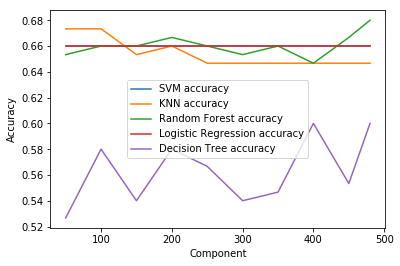

In [455]:
'''
PCA tunning hyperparameters
'''
from sklearn.decomposition import PCA
components=[50,100,150,200,250,300,350,400,450,480]

svm_accuracy_list = []
knn_accuracy_list=[]
rf_accuracy_list=[]
lg_accuracy_list=[]
dt_accuracy_list=[]
for component in components:
    pca=PCA(n_components=component).fit(X_train)
    X_train_reduced=pca.transform(X_train)
    X_test_reduced=pca.transform(X_test)
#     SVM
    svm_model=SVC(kernel='poly',degree=3,C=0.1).fit(X_train_reduced,y_train)
    svm_predict=svm_model.predict(X_test_reduced)
    svm_accuracy_list.append(accuracy_score(svm_predict,y_test))
    
    #   KNN with 20 neighbours
    knn_model=KNeighborsClassifier(n_neighbors=20,p=1,metric="minkowski").fit(X_train_reduced,y_train)
    knn_predict=knn_model.predict(X_test_reduced)
    knn_accuracy_list.append(accuracy_score(knn_predict,y_test))
    
     #   RF 
    rf_model=RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1).fit(X_train_reduced,y_train)
    rf_predict=rf_model.predict(X_test_reduced)
    rf_accuracy_list.append(accuracy_score(rf_predict,y_test))
    
    #   Logistic Regression 
    lg_model=LogisticRegression(C=0.1).fit(X_train_reduced,y_train)
    lg_predict=lg_model.predict(X_test_reduced)
    lg_accuracy_list.append(accuracy_score(lg_predict,y_test))
    
    #   Decision tree
    dt_model=DecisionTreeClassifier(max_depth=200).fit(X_train_reduced,y_train)
    dt_predict=dt_model.predict(X_test_reduced)
    dt_accuracy_list.append(accuracy_score(dt_predict,y_test))
    
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(components, svm_accuracy_list, label="SVM accuracy")
plt.plot(components, knn_accuracy_list, label="KNN accuracy")
plt.plot(components, rf_accuracy_list, label="Random Forest accuracy")
plt.plot(components, lg_accuracy_list, label="Logistic Regression accuracy")
plt.plot(components, dt_accuracy_list, label="Decision Tree accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Component")
plt.legend()  



In [473]:
'''
neural network classifier
'''
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

pca=PCA(n_components=81).fit(X_train)
X_train_reduced=pca.transform(X_train)
X_test_reduced=pca.transform(X_test)

n_nodes=20
mlp=MLPClassifier(activation='tanh', hidden_layer_sizes=[n_nodes,n_nodes,n_nodes],random_state=42)
mlp.fit(X_train_reduced, y_train)


print("Accuracy of training set: {:.2f}".format(mlp.score(X_train_reduced, y_train)))
print("Accuracy of testing set: {:.2f}".format(mlp.score(X_test_reduced, y_test)))

test_df=pd.read_csv('test_features.csv')
y_pred = mlp.predict(test_df)
print(y_pred)


Accuracy of training set: 0.81
Accuracy of testing set: 0.63
[1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0]


In [464]:
test_df=pd.read_csv('test_features.csv')
# display(test_df)
pca=PCA(n_components=81).fit(train_features_df)
X_train_reduced_knn=pca.transform(train_features_df)
# X_test_reduced_knn=pca.transform(test_df)

knn_tunned_clf=LogisticRegression(C=0.1).fit(X_train_reduced_knn,train_target)
knn_pred=knn_tunned_clf.predict(test_df)
print(knn_pred)
# y_pred = mlp.predict(df_test)
# print(y_pred)

[1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1]
